In [30]:
from dlisio import dlis
import numpy as np
import pandas as pd
# from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import sklearn
pd.set_option('display.max_rows', 50)

In [31]:
# loading lab_data from an Excel file
LAB_PATH = r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\HRDH_LAB_DATA.xlsx"
lab_data = pd.read_excel(LAB_PATH, sheet_name=2).set_index('Depth_ft')
lab_data

,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
10742.5,20,0.0,1.5,0,0,0.1,0.0,0,0,0,...,30.15,0.00,0.00,68.40,0,0,0.15,0,0.59,0
10743.4,21,0.0,0.7,0,0,0.0,0.0,0,0,0,...,30.49,0.01,0.07,68.28,0,0,0.09,0,0.55,0
10744.3,22,0.0,3.0,0,0,0.1,0.0,0,0,0,...,27.48,0.00,0.14,70.30,0,0,0.19,0,0.60,0
10745.4,23,0.0,22.8,0,0,0.1,0.3,0,0,0,...,17.83,0.07,0.35,71.44,0,0,0.46,0,0.46,0
10746.5,24,0.0,3.7,0,0,0.1,0.1,0,0,0,...,28.19,0.03,0.16,68.81,0,0,0.17,0,0.54,0
10760.3,36,0.0,92.7,0,0,0.4,1.2,0,0,0,...,2.18,0.16,0.40,76.64,0,0,0.68,0,0.12,0
10761.4,37,0.0,64.5,0,0,0.1,0.5,0,0,0,...,8.75,0.16,0.29,74.65,0,0,0.64,0,0.47,0
10762.4,38,0.0,47.4,0,0,0.1,0.4,0,0,0,...,12.00,0.07,0.23,73.48,0,0,0.44,0,0.69,0
10767.7,43,0.0,56.7,0,0,0.1,0.9,0,0,0,...,10.88,0.10,0.28,74.37,0,0,0.38,0,0.49,0


In [ ]:
# Extracting XRF and XRD columns
# Assuming the columns start with 'XRF_' or 'XRD_'
xrf_xrd_columns = [c for c in lab_data.columns if c.startswith(('XRF_', 'XRD_'))]
lab_df = lab_data[xrf_xrd_columns] 
lab_df

,XRD_Calcite,XRD_Dolomite,XRD_Ankerite,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectite,XRD_Kaolinite,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
Depth_ft,,,,,,,,,,,,,,,,,,,,,
10742.5,0.0,1.5,0,0,0.1,0.0,0,0,0,0,...,30.15,0.00,0.00,68.40,0,0,0.15,0,0.59,0
10743.4,0.0,0.7,0,0,0.0,0.0,0,0,0,0,...,30.49,0.01,0.07,68.28,0,0,0.09,0,0.55,0
10744.3,0.0,3.0,0,0,0.1,0.0,0,0,0,0,...,27.48,0.00,0.14,70.30,0,0,0.19,0,0.60,0
10745.4,0.0,22.8,0,0,0.1,0.3,0,0,0,0,...,17.83,0.07,0.35,71.44,0,0,0.46,0,0.46,0
10746.5,0.0,3.7,0,0,0.1,0.1,0,0,0,0,...,28.19,0.03,0.16,68.81,0,0,0.17,0,0.54,0
10760.3,0.0,92.7,0,0,0.4,1.2,0,0,0,0,...,2.18,0.16,0.40,76.64,0,0,0.68,0,0.12,0
10761.4,0.0,64.5,0,0,0.1,0.5,0,0,0,0,...,8.75,0.16,0.29,74.65,0,0,0.64,0,0.47,0
10762.4,0.0,47.4,0,0,0.1,0.4,0,0,0,0,...,12.00,0.07,0.23,73.48,0,0,0.44,0,0.69,0
10767.7,0.0,56.7,0,0,0.1,0.9,0,0,0,0,...,10.88,0.10,0.28,74.37,0,0,0.38,0,0.49,0


In [ ]:
# lab_data.info()
lab_df.info()
# xrf_xrd_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 10742.5 to 10866.5
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   XRD_Calcite      18 non-null     float64
 1   XRD_Dolomite     18 non-null     float64
 2   XRD_Ankerite     18 non-null     int64  
 3   XRD_Siderite     18 non-null     int64  
 4   XRD_Quartz       18 non-null     float64
 5   XRD_Plagioclase  18 non-null     float64
 6   XRD_K-Feldspar   18 non-null     int64  
 7   XRD_Illite/Mica  18 non-null     int64  
 8   XRD_Smectite     18 non-null     int64  
 9   XRD_Kaolinite    18 non-null     int64  
 10  XRD_Chlorite     18 non-null     int64  
 11  XRD_Mixed Clay   18 non-null     int64  
 12  XRD_Anhydrite    18 non-null     float64
 13  XRD_Gypsum       18 non-null     int64  
 14  XRD_Pyrite       18 non-null     float64
 15  XRD_Hematite     18 non-null     int64  
 16  XRF_Na           18 non-null     float64
 17  XRF_Mg      

In [34]:
def dlis_to_df(path, needed=None):
    """Load DLIS file and return a DataFrame with well log data."""
    log = dlis.load(path)[0]
    frame = log.frames[0]
    
    # Get channel names for reference
    channel_names = [ch.name for ch in frame.channels]
    print(f"Found {len(channel_names)} channels: {channel_names[:5]}...")
    
    try:
        # Get the curves data as a structured array
        curves_data = frame.curves()
        print(f"Curves data type: {type(curves_data)}")
        
        # Check if it's a structured array with field names
        if hasattr(curves_data.dtype, 'names') and curves_data.dtype.names:
            field_names = curves_data.dtype.names
            print(f"Found structured array with {len(field_names)} fields")
            
            # Create a dictionary to map field names to simple channel names
            field_to_channel = {}
            for field in field_names:
                # For complex field names like (('T.CHANNEL-I.GR-O.1-C.0', 'GR'), '<f4')
                try:
                    if isinstance(field, tuple) and len(field) > 1:
                        if isinstance(field[0], tuple):
                            simple_name = field[0][1]  # Extract 'GR' from the tuple
                            field_to_channel[field] = simple_name
                        continue
                except:
                    pass
                
                # For simpler string field names
                for name in channel_names:
                    if name in str(field):
                        field_to_channel[field] = name
                        break
            
            # Extract data for each field - handle multi-dimensional arrays
            data_dict = {}
            for field in field_names:
                # Get the simple name if we mapped it
                simple_name = field_to_channel.get(field)
                if not simple_name:
                    continue
                
                try:
                    # Get the data
                    array = curves_data[field]
                    
                    # Check if it's multi-dimensional
                    if array.ndim > 1 or (hasattr(array, 'shape') and len(array.shape) > 1):
                        # For multi-dimensional arrays, take first element or flatten
                        print(f"Skipping multi-dimensional array for {simple_name} with shape {array.shape}")
                        continue
                    
                    # Only add 1D arrays to our dictionary
                    data_dict[simple_name] = array
                    
                except Exception as e:
                    print(f"Error extracting {simple_name} from {field}: {e}")
            
            # Find the depth channel
            depth_channel = 'TDEP'
            if depth_channel not in data_dict:
                for name in ['DEPTH', 'DEPT', 'Depth', 'depth']:
                    if name in data_dict:
                        depth_channel = name
                        break
            
            # Create DataFrame
            if data_dict:
                # Make sure all arrays have the same length
                lengths = {name: len(arr) for name, arr in data_dict.items()}
                if len(set(lengths.values())) > 1:
                    print(f"Warning: Arrays have different lengths: {lengths}")
                    # Find minimum length and truncate all arrays
                    min_len = min(lengths.values())
                    data_dict = {name: arr[:min_len] for name, arr in data_dict.items()}
                
                df = pd.DataFrame(data_dict)
                
                # Set depth as index if it exists
                if depth_channel in df.columns:
                    df = df.set_index(depth_channel)
                
                # Filter columns if needed
                if needed is not None:
                    valid_cols = [col for col in needed if col in df.columns]
                    if valid_cols:
                        df = df[valid_cols]
                    else:
                        print(f"Warning: None of the requested columns found in {list(df.columns)}")
                
                print(f"Final DataFrame shape: {df.shape}")
                return df
            else:
                print("Could not extract any data from fields")
                return pd.DataFrame()
        else:
            print("Curves data is not a structured array with named fields")
            # Print more info about the array to help debugging
            print(f"Array shape: {curves_data.shape}")
            print(f"Array dtype: {curves_data.dtype}")
            print(f"First few values: {curves_data[:5]}")
            return pd.DataFrame()
            
    except Exception as e:
        print(f"Error processing DLIS file: {e}")
        import traceback
        traceback.print_exc()
        return pd.DataFrame()
    
# Path to the DLIS log file for HRDH-1119
LOG_PATH_1119_0 = r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_0\8375\WL\Field\Deliverables\HRDH_1119_0_29MAY2012_ZDL-CN-DSL_ML_BA.dlis"

# Load log data for HRDH-1119
log_df = dlis_to_df(LOG_PATH_1119_0)
log_df

Found 38 channels: ['TDEP', 'BIT', 'BVOL', 'CAL', 'CALZ']...
Curves data type: <class 'numpy.ndarray'>
Found structured array with 39 fields
Skipping multi-dimensional array for SLSP with shape (2952, 254)
Skipping multi-dimensional array for SLSP with shape (2952, 254)
Final DataFrame shape: (2952, 27)


,BIT,BVOL,CAL,CHT,CN,CVOL,GR,HRD1,HRD2,K,...,SPD,SSD,SSN,TEN,TH,U,WTBH,ZCOR,ZDEN,ZDNC
TDEP,,,,,,,,,,,,,,,,,,,,,
10842.75,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,226.943008,-999.25,-999.25,-999.25
10843.00,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,226.979904,-999.25,-999.25,-999.25
10843.25,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,226.990448,-999.25,-999.25,-999.25
10843.50,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,226.981537,-999.25,-999.25,-999.25
10843.75,-999.250,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,226.960663,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579.50,8.375,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.25,-999.25,-999.25
11579.75,8.375,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.25,-999.25,-999.25
11580.00,8.375,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.250000,-999.25,-999.25,-999.25


# cleaning

In [1]:
null_values = -999.25
mask = (log_df == null_values)
counts = mask.sum()
print(counts > 0 )

log_df_clean = log_df.replace(-999.25, np.nan)

# --- 2) Quick-hit missingness summary
null_pct = log_df_clean.isna().mean() * 100
print("🔍 Missing Data % per curve:")
print(null_pct.sort_values(ascending=False))

# --- 3) Visual QA: missingness bar & matrix
plt.figure(figsize=(10,4))
msno.bar(log_df_clean, sort='descending')
plt.title("Missing Value Bar Chart")
plt.show()

plt.figure(figsize=(10,6))
msno.matrix(log_df_clean)
plt.title("Missing Value Matrix")
plt.show()

# --- 4) Cull fat curves: drop any curve > 40% null
threshold = 40.0
to_drop = null_pct[null_pct > threshold].index.tolist()
print(f"🗑️  Dropping curves > {threshold:.0f}% missing: {to_drop}")
log_df_clean.drop(columns=to_drop, inplace=True)

# --- 5) Interpolate & Fill: bridge small gaps, then edge-fill
#    – linear interp on gaps ≤ 5 samples
log_df_clean.interpolate(method='linear', limit=5, inplace=True)
#    – propagate any remaining NaNs forward/backward
log_df_clean.ffill(inplace=True)
log_df_clean.bfill(inplace=True)

# --- 6) Post-QA check
remaining_nulls = log_df_clean.isna().sum()
print("✅ Post-processing null counts:")
print(remaining_nulls[remaining_nulls > 0] or "No nulls remain!")

# Now log_df_clean is QA’d, depth-aligned, and ready for matching & viz

NameError: name 'log_df' is not defined

In [ ]:
# Display first few depth values from both datasets
# print("First 10 log depths:")
# print(log_df.index[:10])

# print("\nFirst 10 lab depths:")
# print(lab_data.index[:10])

# Create a DataFrame to summarize both depth distributions
depth_stats = pd.DataFrame({
    'Log Depths': pd.Series(log_df_clean.index),
    'Lab Depths': pd.Series(lab_df.index),
})
#  Display summary statistics
print("\nDepth statistics:")
print(depth_stats.describe())


Depth statistics:
         Log Depths    Lab Depths
count   2952.000000     18.000000
mean   11211.625000  10783.227778
std      213.078331     42.496018
min    10842.750000  10742.500000
25%    11027.187500  10749.950000
50%    11211.625000  10768.550000
75%    11396.062500  10798.900000
max    11580.500000  10866.500000


In [ ]:
#Summary of the number of nulls
log_df_clean.describe()


SyntaxError: invalid syntax (531153579.py, line 2)

In [ ]:
from scipy.spatial import cKDTree

def kd_tree_depth_join(log_df, lab_df, tolerance=0.5):
    """Join log and lab data by nearest depth within tolerance."""
    # Check for duplicates in indices
    if not log_df.index.is_unique:
        print(f"Warning: Log data contains {log_df.index.duplicated().sum()} duplicate depth values")
        # Keep first occurrence of each depth
        log_df = log_df[~log_df.index.duplicated(keep='first')]
        
    if not lab_df.index.is_unique:
        print(f"Warning: Lab data contains {lab_df.index.duplicated().sum()} duplicate depth values")
        # Keep first occurrence of each depth
        lab_df = lab_df[~lab_df.index.duplicated(keep='first')]
    
    log_depths = log_df.index.values
    lab_depths = lab_df.index.values
    
    # Build KD-tree on lab depths
    tree = cKDTree(lab_depths.reshape(-1, 1))
    dist, idx = tree.query(log_depths.reshape(-1, 1), distance_upper_bound=tolerance)
    
    # Only keep matches within tolerance
    mask = dist != float('inf')
    matched_log = log_df.iloc[mask].copy()
    matched_lab = lab_df.iloc[idx[mask]].copy()
    
    # Store original depths as columns before resetting indices
    matched_log = matched_log.reset_index()
    matched_log.rename(columns={matched_log.columns[0]: 'Log_Depth'}, inplace=True)
    
    matched_lab = matched_lab.reset_index()
    matched_lab.rename(columns={matched_lab.columns[0]: 'Lab_Depth'}, inplace=True)
    
    # Join DataFrames with reset indices
    joined = pd.concat([matched_log, matched_lab], axis=1)
    
    # Remove duplicate columns (if any columns appear in both DataFrames)
    joined = joined.loc[:, ~joined.columns.duplicated()]
    
    return joined

# Join log and lab data using KD-tree
joined_df = kd_tree_depth_join(log_df, lab_df, tolerance=0.5)
print(f"Found {len(joined_df)} matches with 0.5 ft tolerance")
joined_df

Found 10 matches with 0.5 ft tolerance


,Log_Depth,BIT,BVOL,CAL,CHT,CN,CVOL,GR,HRD1,HRD2,...,XRF_S,XRF_Cl,XRF_K,XRF_Ca,XRF_Ti,XRF_Mn,XRF_Fe,XRF_Zr,XRF_Sr,XRF_Ba
0,10864.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,11.879782,-999.25,-999.25,...,0.68,0.07,0.26,90.24,0,0,0.63,0,0.07,0
1,10864.50,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12.272094,-999.25,-999.25,...,0.68,0.07,0.26,90.24,0,0,0.63,0,0.07,0
2,10864.75,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12.462829,-999.25,-999.25,...,0.68,0.07,0.26,90.24,0,0,0.63,0,0.07,0
3,10865.00,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12.350357,-999.25,-999.25,...,1.84,0.07,0.21,91.40,0,0,0.59,0,0.11,0
4,10865.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,11.887094,-999.25,-999.25,...,1.84,0.07,0.21,91.40,0,0,0.59,0,0.11,0
5,10865.50,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,11.098453,-999.25,-999.25,...,1.84,0.07,0.21,91.40,0,0,0.59,0,0.11,0
6,10865.75,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,10.074943,-999.25,-999.25,...,1.84,0.07,0.21,91.40,0,0,0.59,0,0.11,0
7,10866.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,7.987625,-999.25,-999.25,...,2.07,0.03,0.19,92.39,0,0,0.48,0,0.15,0
8,10866.50,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,7.293121,-999.25,-999.25,...,2.07,0.03,0.19,92.39,0,0,0.48,0,0.15,0
9,10866.75,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,7.009657,-999.25,-999.25,...,2.07,0.03,0.19,92.39,0,0,0.48,0,0.15,0


In [ ]:
depth_comparison = pd.DataFrame({
    'Log_Depth': joined_df['Log_Depth'],
    'Lab_Depth': joined_df['Lab_Depth'],
    'Difference': joined_df['Log_Depth'] - joined_df['Lab_Depth']
})
depth_comparison.sort_values('Log_Depth')


,Log_Depth,Lab_Depth,Difference
0,10864.25,10864.5,-0.25
1,10864.50,10864.5,0.00
2,10864.75,10864.5,0.25
3,10865.00,10865.4,-0.40
4,10865.25,10865.4,-0.15
5,10865.50,10865.4,0.10
6,10865.75,10865.4,0.35
7,10866.25,10866.5,-0.25
8,10866.50,10866.5,0.00
9,10866.75,10866.5,0.25


# Visualizations  

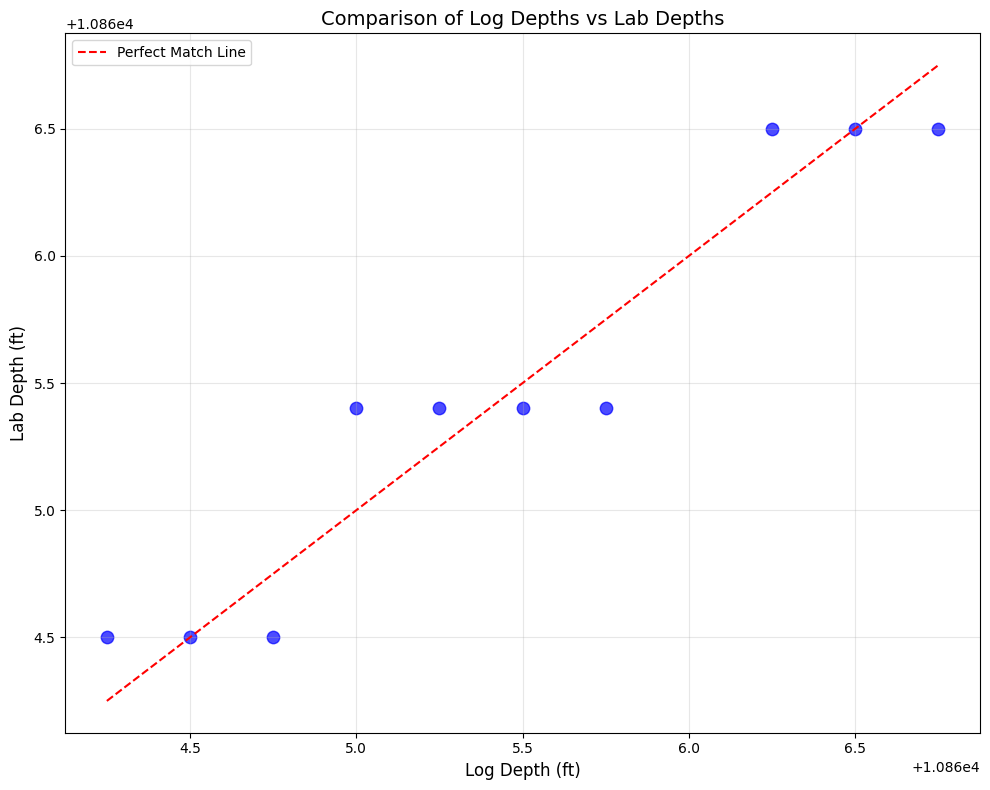

In [ ]:
# Plot depths against each other
plt.figure(figsize=(10, 8))
plt.scatter(joined_df['Log_Depth'], joined_df['Lab_Depth'], color='blue', alpha=0.7, s=80)
plt.plot([joined_df['Log_Depth'].min(), joined_df['Log_Depth'].max()], 
         [joined_df['Log_Depth'].min(), joined_df['Log_Depth'].max()], 
         'r--', label='Perfect Match Line')
plt.xlabel('Log Depth (ft)', fontsize=12)
plt.ylabel('Lab Depth (ft)', fontsize=12)
plt.title('Comparison of Log Depths vs Lab Depths', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

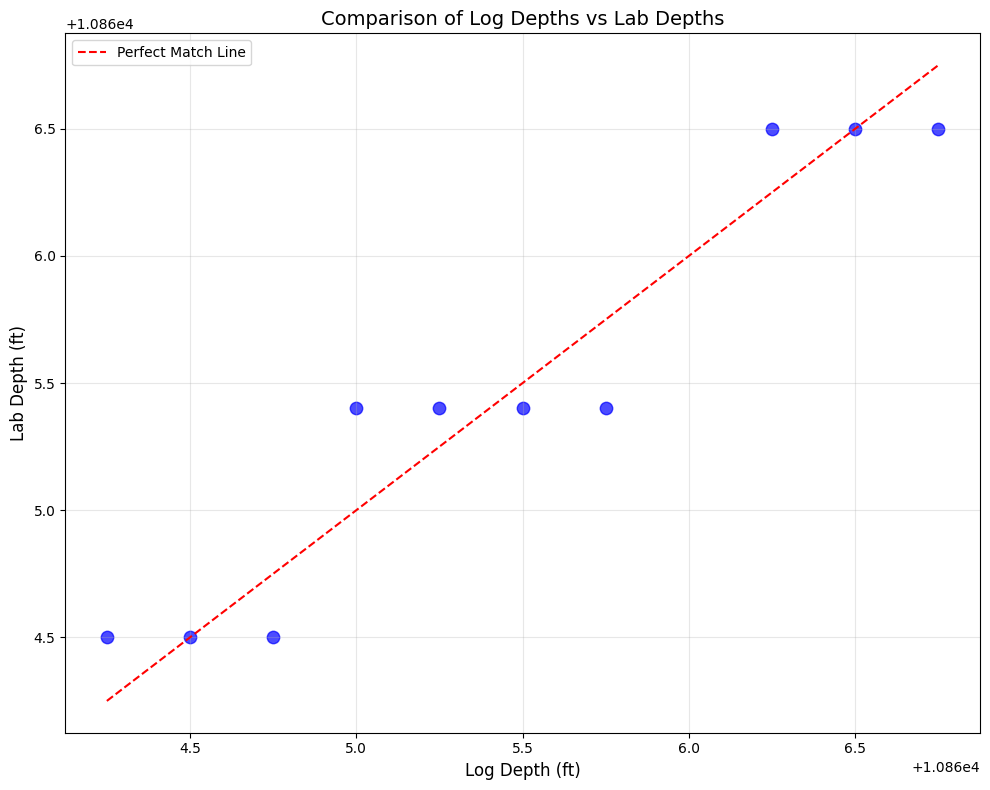

In [ ]:
# Plot depths against each other
plt.figure(figsize=(10, 8))
plt.scatter(joined_df['Log_Depth'], joined_df['Lab_Depth'], color='blue', alpha=0.7, s=80)
plt.plot([joined_df['Log_Depth'].min(), joined_df['Log_Depth'].max()], 
         [joined_df['Log_Depth'].min(), joined_df['Log_Depth'].max()], 
         'r--', label='Perfect Match Line')
plt.xlabel('Log Depth (ft)', fontsize=12)
plt.ylabel('Lab Depth (ft)', fontsize=12)
plt.title('Comparison of Log Depths vs Lab Depths', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

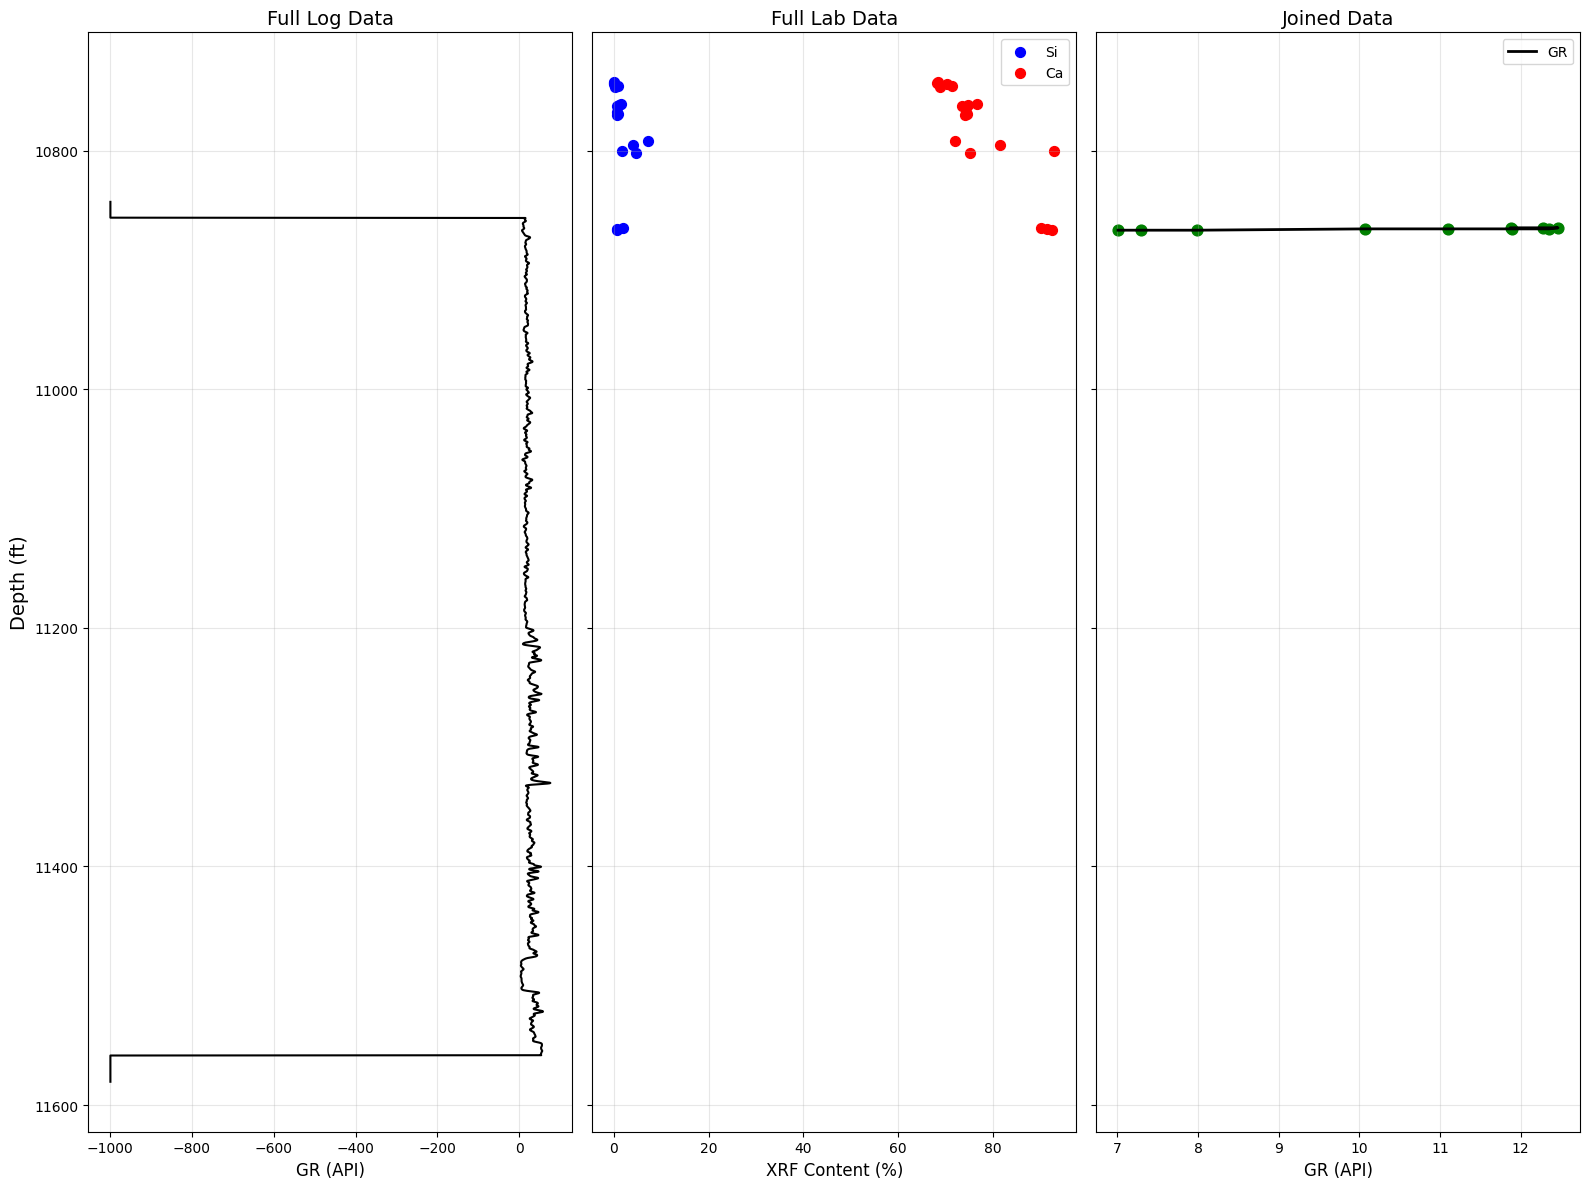

In [ ]:
# Create a plot showing both datasets with their full depth ranges
fig, axes = plt.subplots(1, 3, figsize=(16, 12), sharey=True)

# Plot 1: Full log data
axes[0].plot(log_df['GR'], log_df.index, 'k-', lw=1.5)
axes[0].set_xlabel('GR (API)', fontsize=12)
axes[0].set_ylabel('Depth (ft)', fontsize=14)
axes[0].set_title('Full Log Data', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].invert_yaxis()  # Standard well log convention

# Plot 2: Full lab data
axes[1].scatter(xrf_xrd_data['XRF_Si'], xrf_xrd_data.index, c='blue', s=50, label='Si')
axes[1].scatter(xrf_xrd_data['XRF_Ca'], xrf_xrd_data.index, c='red', s=50, label='Ca')
axes[1].set_xlabel('XRF Content (%)', fontsize=12)
axes[1].set_title('Full Lab Data', fontsize=14)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Plot 3: Matched data points
axes[2].plot(joined_df['GR'], joined_df['Lab_Depth'], 'k-', lw=2, label='GR')
axes[2].scatter(joined_df['GR'], joined_df['Lab_Depth'], c='green', s=60)
axes[2].set_xlabel('GR (API)', fontsize=12)
axes[2].set_title('Joined Data', fontsize=14)
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

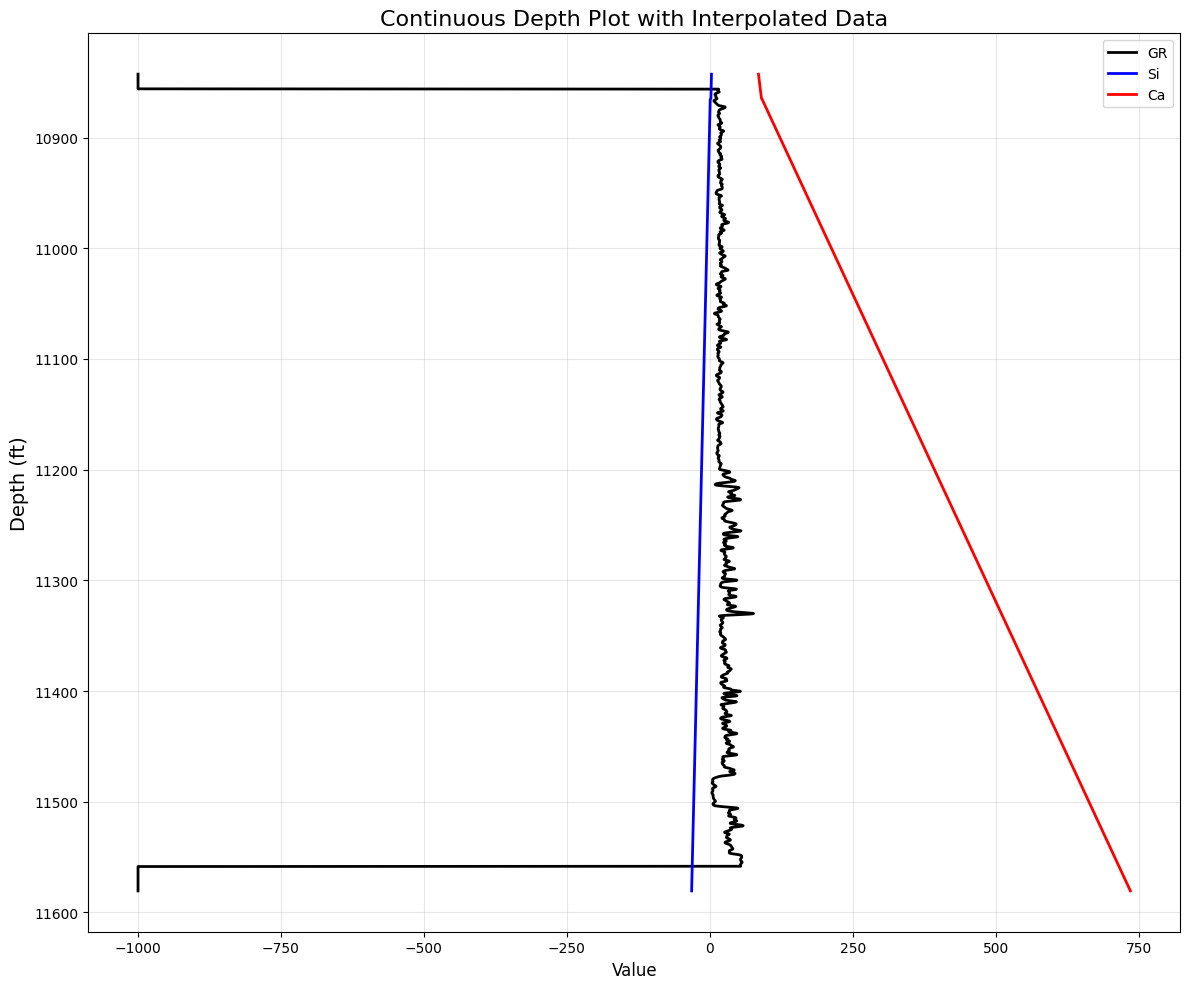

In [ ]:
# Interpolate lab data to match log depths
from scipy.interpolate import interp1d

# Get unique, sorted depth values
log_depths = log_df.index.values
lab_depths = xrf_xrd_data.index.values

# Create interpolation functions for each XRF/XRD column
interpolated_data = {}
for column in xrf_xrd_data.columns:
    # Create interpolation function (use 'nearest' for sparse data)
    f = interp1d(lab_depths, xrf_xrd_data[column].values, 
                 kind='linear', bounds_error=False, fill_value='extrapolate')
    
    # Apply to log depths
    interpolated_data[column] = f(log_depths)

# Create new dataframe with continuous data
continuous_df = log_df.copy()
for column, values in interpolated_data.items():
    continuous_df[column] = values

# Now plot with continuous depth
plt.figure(figsize=(12, 10))
plt.plot(continuous_df['GR'], continuous_df.index, 'k-', lw=2, label='GR')
plt.plot(continuous_df['XRF_Si'], continuous_df.index, 'b-', lw=2, label='Si')
plt.plot(continuous_df['XRF_Ca'], continuous_df.index, 'r-', lw=2, label='Ca')
plt.xlabel('Value', fontsize=12)
plt.ylabel('Depth (ft)', fontsize=14)
plt.title('Continuous Depth Plot with Interpolated Data', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().invert_yaxis()  # Standard well log convention
plt.tight_layout()
plt.show()

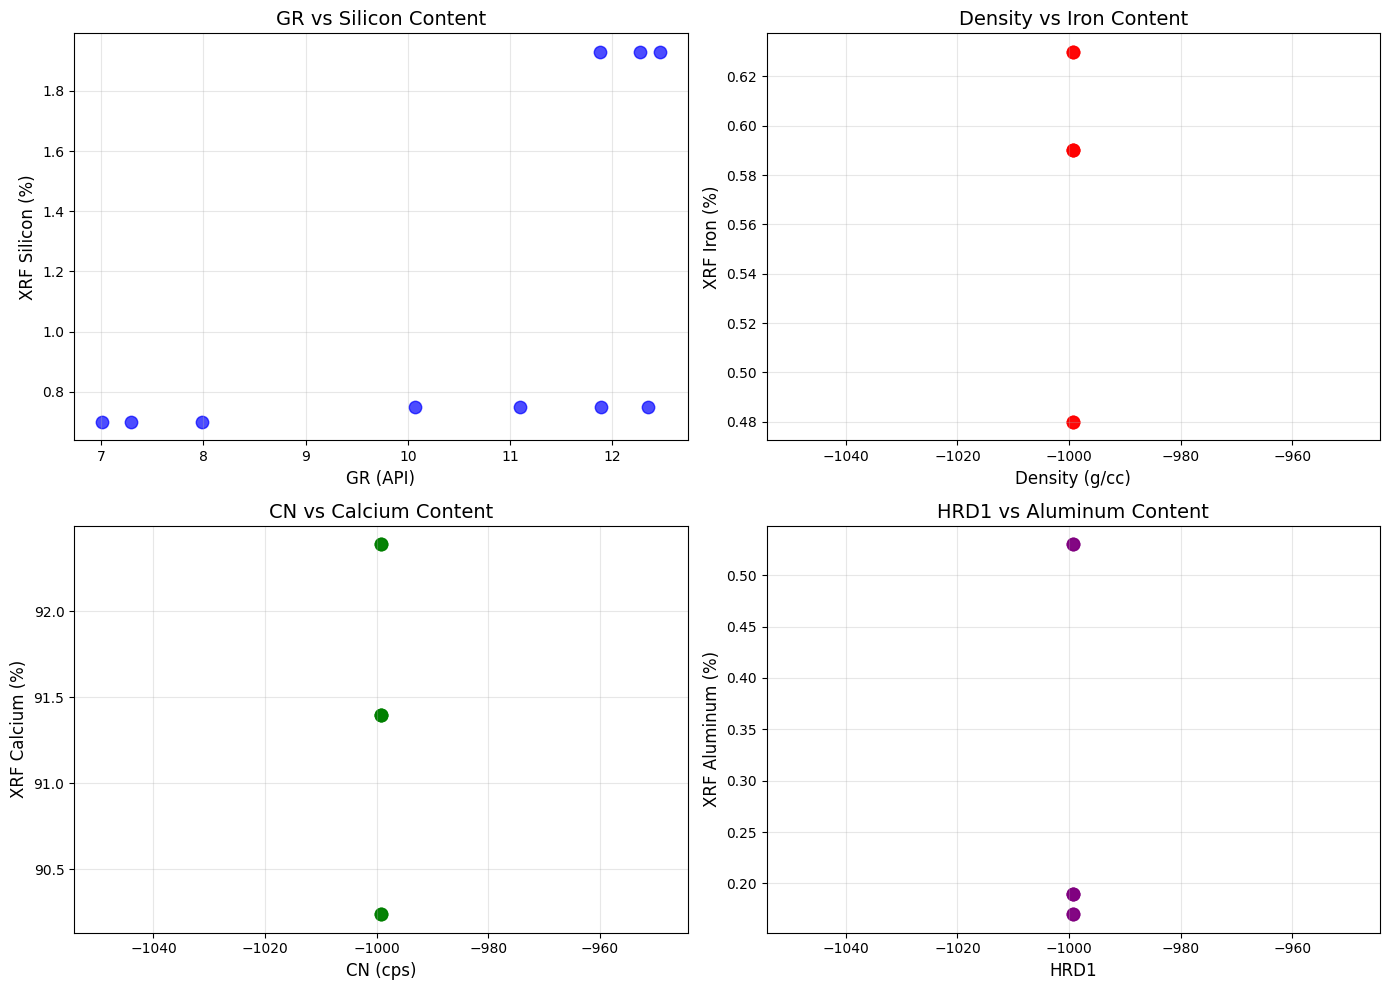

In [ ]:
# Create scatter plots to see relationships between log and XRF data
# explain this vizualization
# comment 
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
well_name = 'HRDH-1119'

# Plot GR vs XRF_Si
axes[0].scatter(joined_df['GR'], joined_df['XRF_Si'], c='blue', s=80, alpha=0.7)
axes[0].set_xlabel('GR (API)', fontsize=12)
axes[0].set_ylabel('XRF Silicon (%)', fontsize=12)
axes[0].set_title('GR vs Silicon Content', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Plot ZDEN vs XRF_Fe
axes[1].scatter(joined_df['ZDEN'], joined_df['XRF_Fe'], c='red', s=80, alpha=0.7)
axes[1].set_xlabel('Density (g/cc)', fontsize=12)
axes[1].set_ylabel('XRF Iron (%)', fontsize=12)
axes[1].set_title('Density vs Iron Content', fontsize=14)
axes[1].grid(True, alpha=0.3)

# Plot CN vs XRF_Ca
axes[2].scatter(joined_df['CN'], joined_df['XRF_Ca'], c='green', s=80, alpha=0.7)
axes[2].set_xlabel('CN (cps)', fontsize=12)
axes[2].set_ylabel('XRF Calcium (%)', fontsize=12)
axes[2].set_title('CN vs Calcium Content', fontsize=14)
axes[2].grid(True, alpha=0.3)

# Plot HRD1 vs XRF_Al
axes[3].scatter(joined_df['HRD1'], joined_df['XRF_Al'], c='purple', s=80, alpha=0.7)
axes[3].set_xlabel('HRD1', fontsize=12)
axes[3].set_ylabel('XRF Aluminum (%)', fontsize=12)
axes[3].set_title('HRD1 vs Aluminum Content', fontsize=14)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

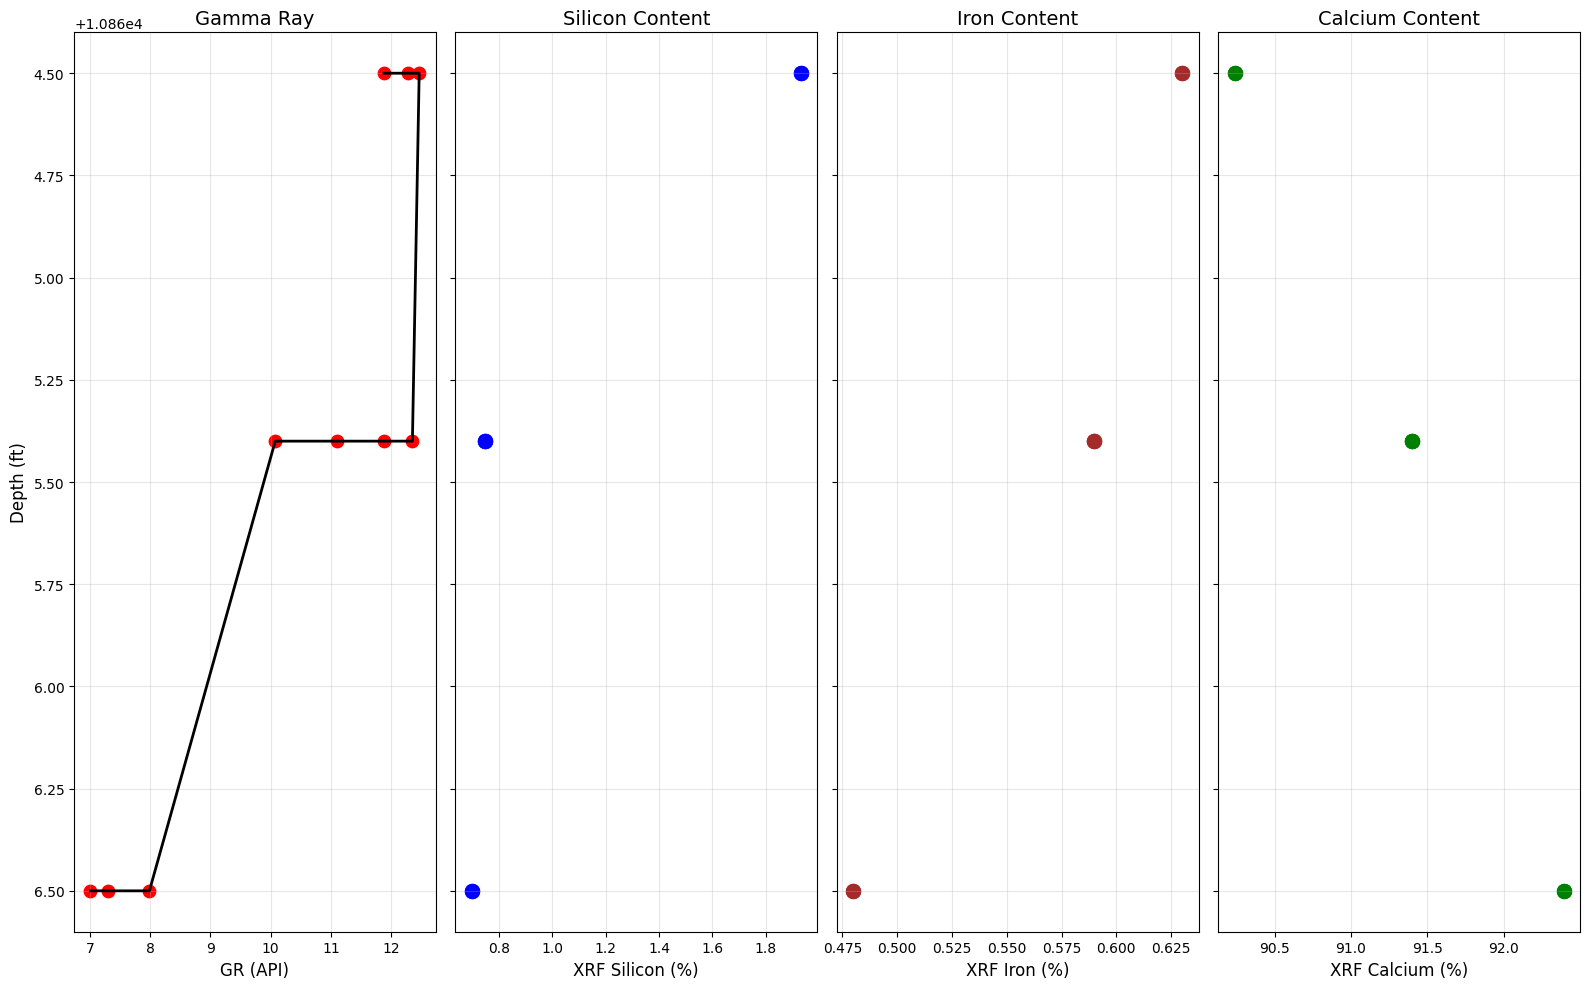

In [ ]:
# Create depth plot with both log curves and lab measurements
fig, axes = plt.subplots(1, 4, figsize=(16, 10), sharey=True)

# Sort by depth for consistent plotting
joined_df_sorted = joined_df.sort_values('Lab_Depth')

# Plot GR log curve
axes[0].plot(joined_df_sorted['GR'], joined_df_sorted['Lab_Depth'], 'k-', lw=2)
axes[0].scatter(joined_df_sorted['GR'], joined_df_sorted['Lab_Depth'], c='red', s=80)
axes[0].set_xlabel('GR (API)', fontsize=12)
axes[0].set_ylabel('Depth (ft)', fontsize=12)
axes[0].set_title('Gamma Ray', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].invert_yaxis()  # Invert y-axis to show increasing depth downward

# Plot Silicon content
axes[1].scatter(joined_df_sorted['XRF_Si'], joined_df_sorted['Lab_Depth'], c='blue', s=100, label='XRF Si')
axes[1].set_xlabel('XRF Silicon (%)', fontsize=12)
axes[1].set_title('Silicon Content', fontsize=14)
axes[1].grid(True, alpha=0.3)

# Plot Iron content
axes[2].scatter(joined_df_sorted['XRF_Fe'], joined_df_sorted['Lab_Depth'], c='brown', s=100, label='XRF Fe')
axes[2].set_xlabel('XRF Iron (%)', fontsize=12)
axes[2].set_title('Iron Content', fontsize=14) 
axes[2].grid(True, alpha=0.3)

# Plot Calcium content
axes[3].scatter(joined_df_sorted['XRF_Ca'], joined_df_sorted['Lab_Depth'], c='green', s=100, label='XRF Ca')
axes[3].set_xlabel('XRF Calcium (%)', fontsize=12)
axes[3].set_title('Calcium Content', fontsize=14)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

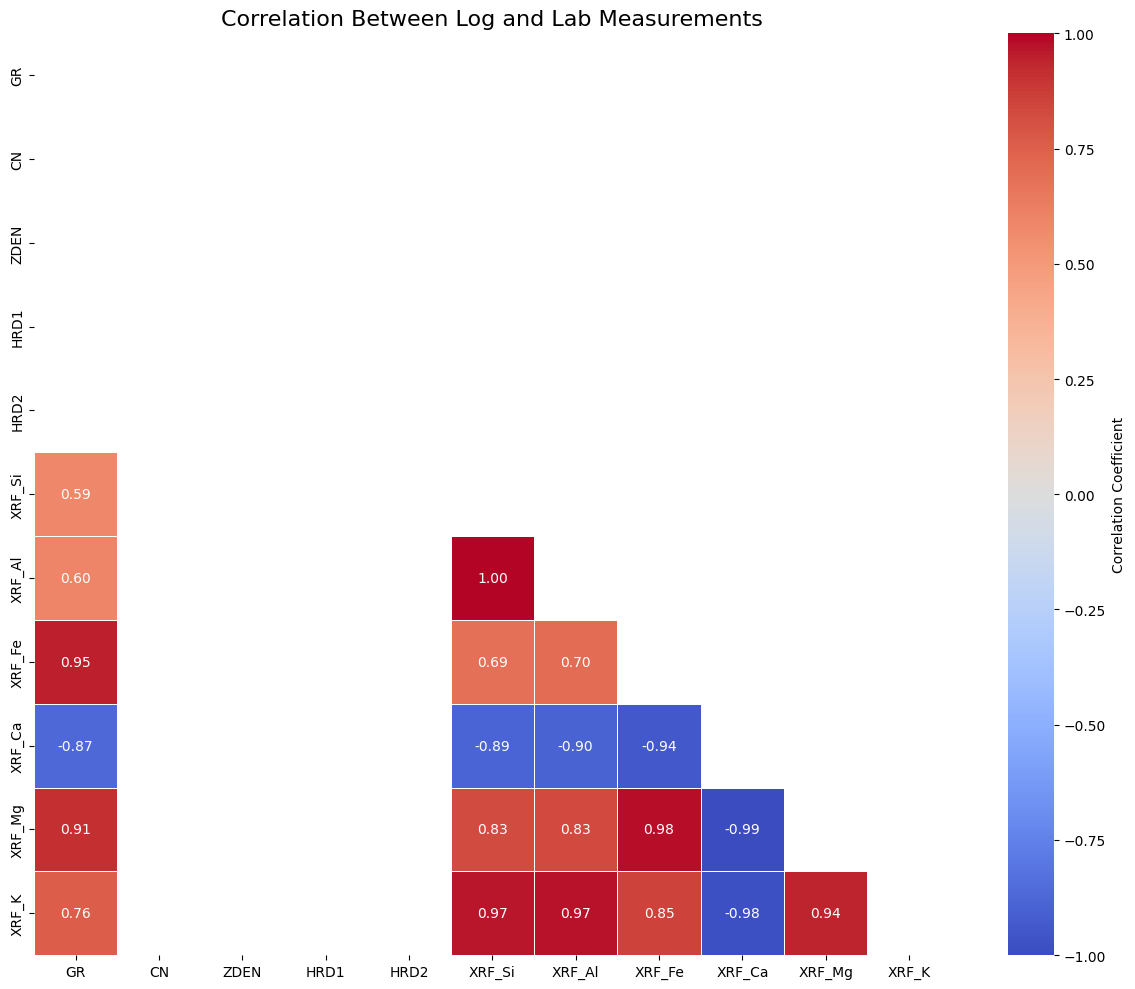

In [ ]:
# Select relevant columns for correlation analysis
corr_cols = ['GR', 'CN', 'ZDEN', 'HRD1', 'HRD2', 'XRF_Si', 'XRF_Al', 'XRF_Fe', 'XRF_Ca', 'XRF_Mg', 'XRF_K']
corr_df = joined_df[corr_cols].copy()

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Create mask for upper triangle
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
                    fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Between Log and Lab Measurements', fontsize=16)
plt.tight_layout()
plt.show()

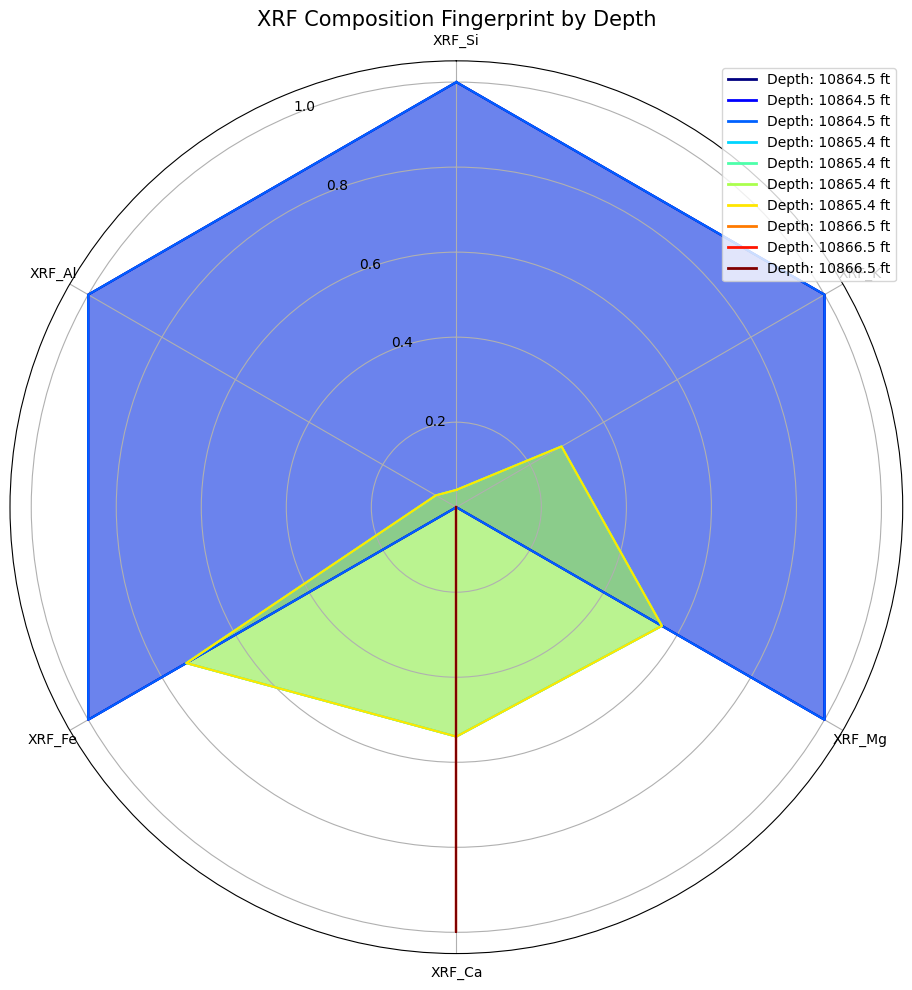

In [ ]:
# Create radar chart to visualize mineral composition at different depths
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.lines import Line2D
from matplotlib.projections import register_projection

def radar_factory(num_vars, frame='circle'):
    # Create the radar chart
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    
    class RadarAxes(plt.PolarAxes):
        name = 'radar'
        
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')
            
        def fill(self, *args, closed=True, **kwargs):
            return super().fill(*(args + (closed,)), **kwargs)
            
        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)
                
        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)
                
    register_projection(RadarAxes)
    return theta

# Select XRF elements to display
elements = ['XRF_Si', 'XRF_Al', 'XRF_Fe', 'XRF_Ca', 'XRF_Mg', 'XRF_K']
data = joined_df[elements].values
sample_depths = joined_df['Lab_Depth'].values

# Normalize data for radar chart
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Plot
theta = radar_factory(len(elements))
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='radar'))

colors = plt.get_cmap('jet')(np.linspace(0, 1, len(data_scaled)))
for i, (d, color) in enumerate(zip(data_scaled, colors)):
    ax.plot(theta, d, color=color)
    ax.fill(theta, d, facecolor=color, alpha=0.25)
    
ax.set_xticks(theta)
ax.set_xticklabels(elements)
ax.set_title('XRF Composition Fingerprint by Depth', fontsize=15)

legend_elements = [Line2D([0], [0], color=colors[i], lw=2, 
                          label=f'Depth: {depth:.1f} ft') 
                  for i, depth in enumerate(sample_depths)]
ax.legend(handles=legend_elements, loc='upper right')
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

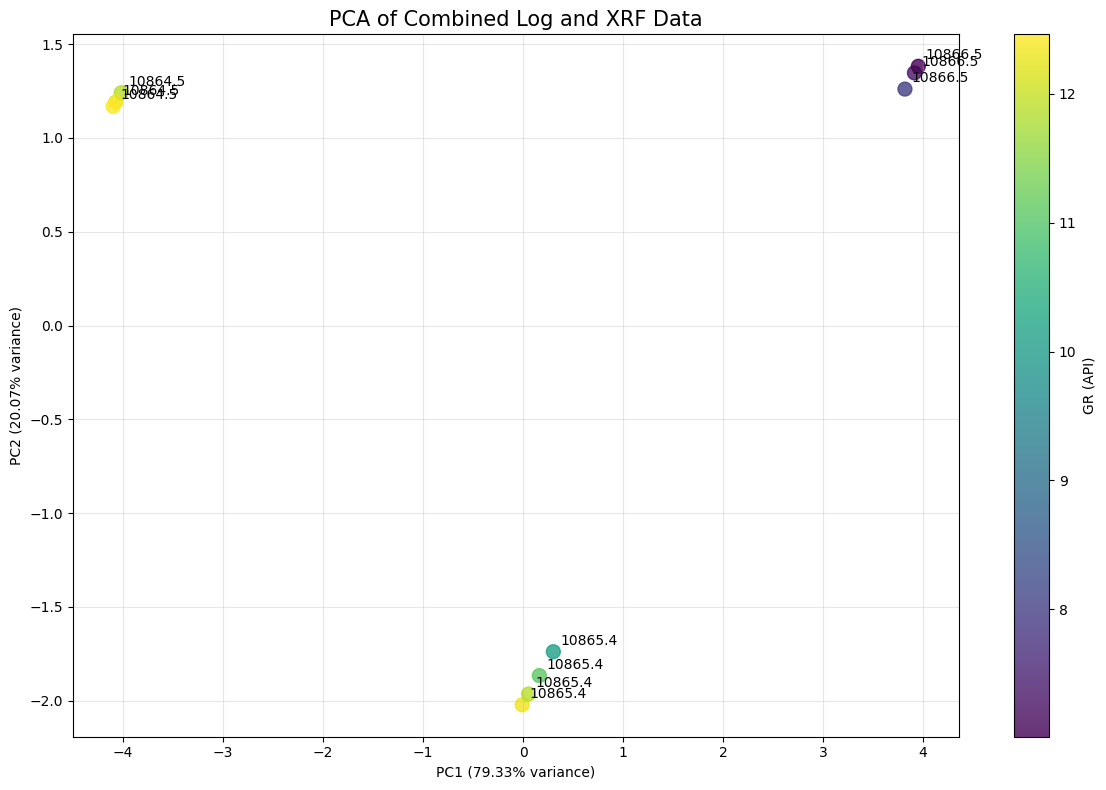

In [ ]:
# Perform PCA to visualize relationships in multidimensional space
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select log and lab columns for PCA
log_cols = ['GR', 'CN', 'ZDEN', 'HRD1', 'HRD2']
xrf_cols = [col for col in joined_df.columns if col.startswith('XRF_')]

# Prepare data
X = joined_df[log_cols + xrf_cols].copy()
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create PCA plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=joined_df['GR'], 
                     cmap='viridis', s=100, alpha=0.8)
plt.colorbar(scatter, label='GR (API)')

# Add depth labels
for i, depth in enumerate(joined_df['Lab_Depth']):
    plt.annotate(f'{depth:.1f}', (pca_result[i, 0], pca_result[i, 1]), 
                xytext=(5, 5), textcoords='offset points')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of Combined Log and XRF Data', fontsize=15)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

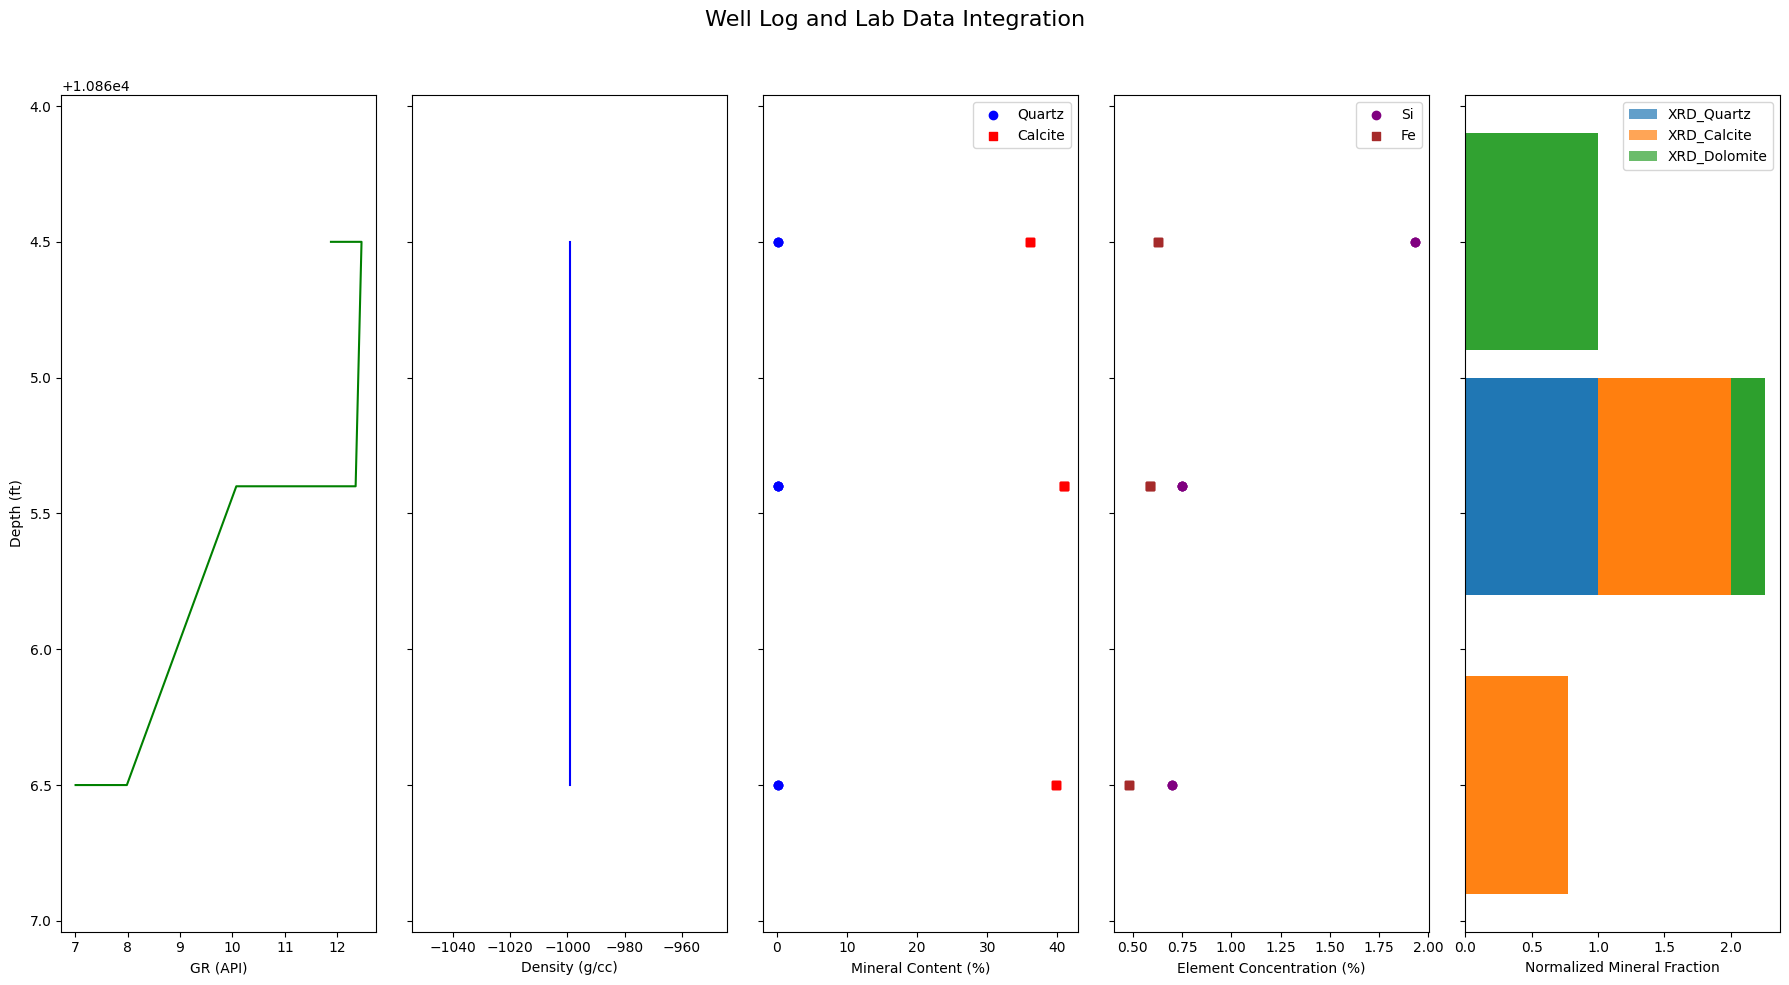

In [ ]:
# 1. Multi-Track Depth Plots
# Create multi-track depth plots to visualize well log and lab data
# This will help in understanding the relationships between different measurements at various depths
fig, axes = plt.subplots(1, 5, figsize=(18, 10), sharey=True)
fig.suptitle('Well Log and Lab Data Integration', fontsize=16)

# Track 1: Basic logs (GR, ZDEN)
axes[0].plot(joined_df['GR'], joined_df['Lab_Depth'], 'g-', label='GR')
axes[0].set_xlabel('GR (API)')
axes[0].set_ylabel('Depth (ft)')
axes[0].invert_yaxis()  # Standard well log convention - depth increases downward

# Track 2: Density log (ZDEN)
axes[1].plot(joined_df['ZDEN'], joined_df['Lab_Depth'], 'b-', label='ZDEN')
axes[1].set_xlabel('Density (g/cc)')

# Track 3: XRD Mineralogy as points
axes[2].scatter(joined_df['XRD_Quartz'], joined_df['Lab_Depth'], c='blue', marker='o', label='Quartz')
axes[2].scatter(joined_df['XRD_Calcite'], joined_df['Lab_Depth'], c='red', marker='s', label='Calcite')
axes[2].set_xlabel('Mineral Content (%)')
axes[2].legend()

# Track 4: XRF Elements
axes[3].scatter(joined_df['XRF_Si'], joined_df['Lab_Depth'], c='purple', marker='o', label='Si')
axes[3].scatter(joined_df['XRF_Fe'], joined_df['Lab_Depth'], c='brown', marker='s', label='Fe')
axes[3].set_xlabel('Element Concentration (%)')
axes[3].legend()

# Track 5: Normalized stacked mineralogy (example: Quartz, Calcite, Dolomite)
from sklearn.preprocessing import MinMaxScaler
minerals = ['XRD_Quartz', 'XRD_Calcite', 'XRD_Dolomite']
mineral_data = joined_df[minerals].values
scaler = MinMaxScaler()
mineral_norm = scaler.fit_transform(mineral_data)
bottom = np.zeros_like(joined_df['Lab_Depth'])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i, mineral in enumerate(minerals):
	axes[4].barh(joined_df['Lab_Depth'], mineral_norm[:, i], left=bottom, color=colors[i], label=mineral, alpha=0.7)
	bottom += mineral_norm[:, i]
axes[4].set_xlabel('Normalized Mineral Fraction')
axes[4].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Text(0.5, 1.0, 'CN vs Calcite')

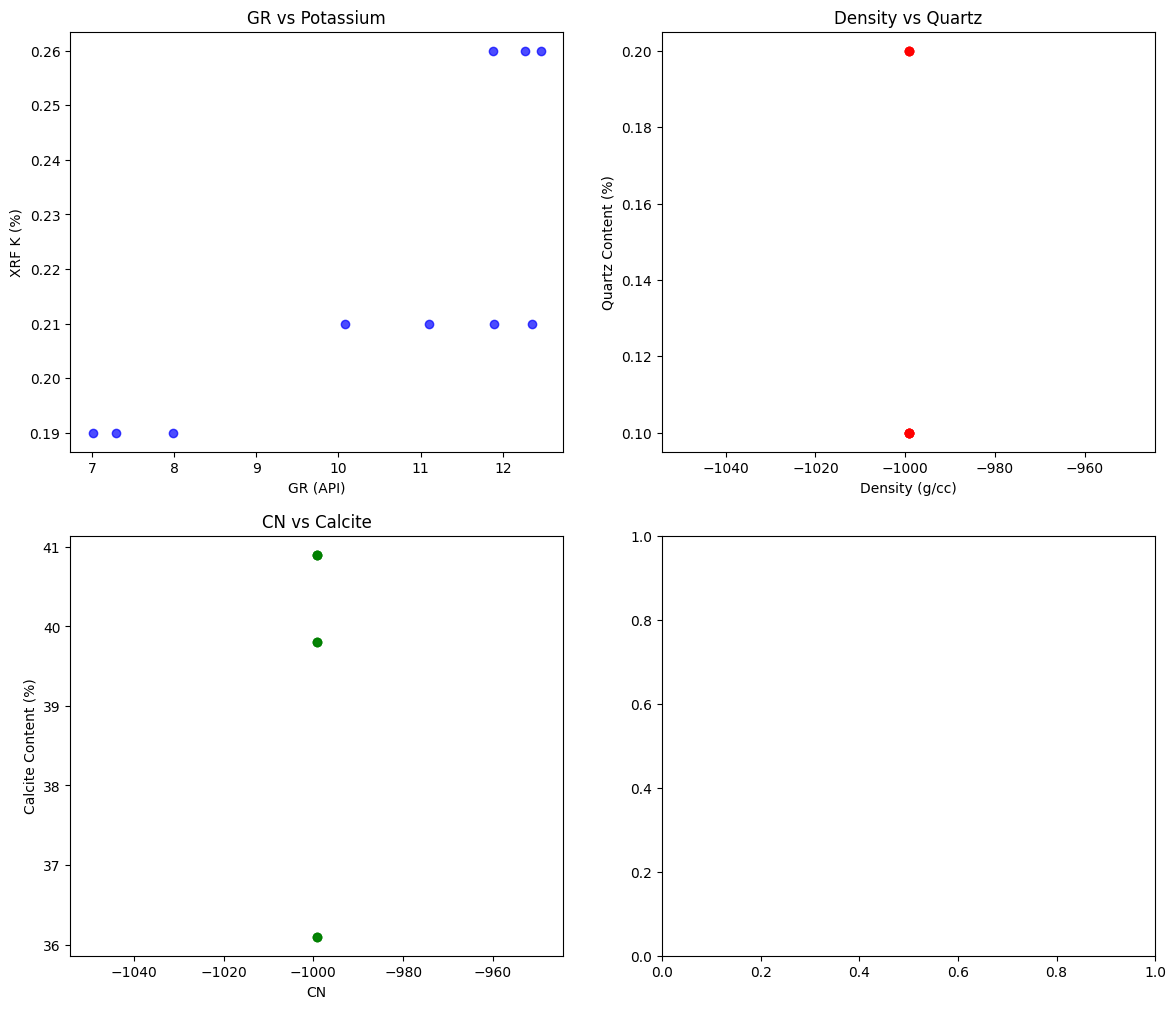

In [ ]:
# 2. Crossplots for Relationship Analysis
# Grid of crossplots to identify relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# GR vs XRF Potassium 
axes[0,0].scatter(joined_df['GR'], joined_df['XRF_K'], c='blue', alpha=0.7)
axes[0,0].set_xlabel('GR (API)')
axes[0,0].set_ylabel('XRF K (%)')
axes[0,0].set_title('GR vs Potassium')

# Density vs XRD Quartz
axes[0,1].scatter(joined_df['ZDEN'], joined_df['XRD_Quartz'], c='red', alpha=0.7)
axes[0,1].set_xlabel('Density (g/cc)')
axes[0,1].set_ylabel('Quartz Content (%)')
axes[0,1].set_title('Density vs Quartz')

# Neutron (CN) vs XRD_Calcite
axes[1,0].scatter(joined_df['CN'], joined_df['XRD_Calcite'], c='green', alpha=0.7)
axes[1,0].set_xlabel('CN')
axes[1,0].set_ylabel('Calcite Content (%)')
axes[1,0].set_title('CN vs Calcite')



Text(0.5, 1.0, 'Correlation Between Log and Lab Measurements')

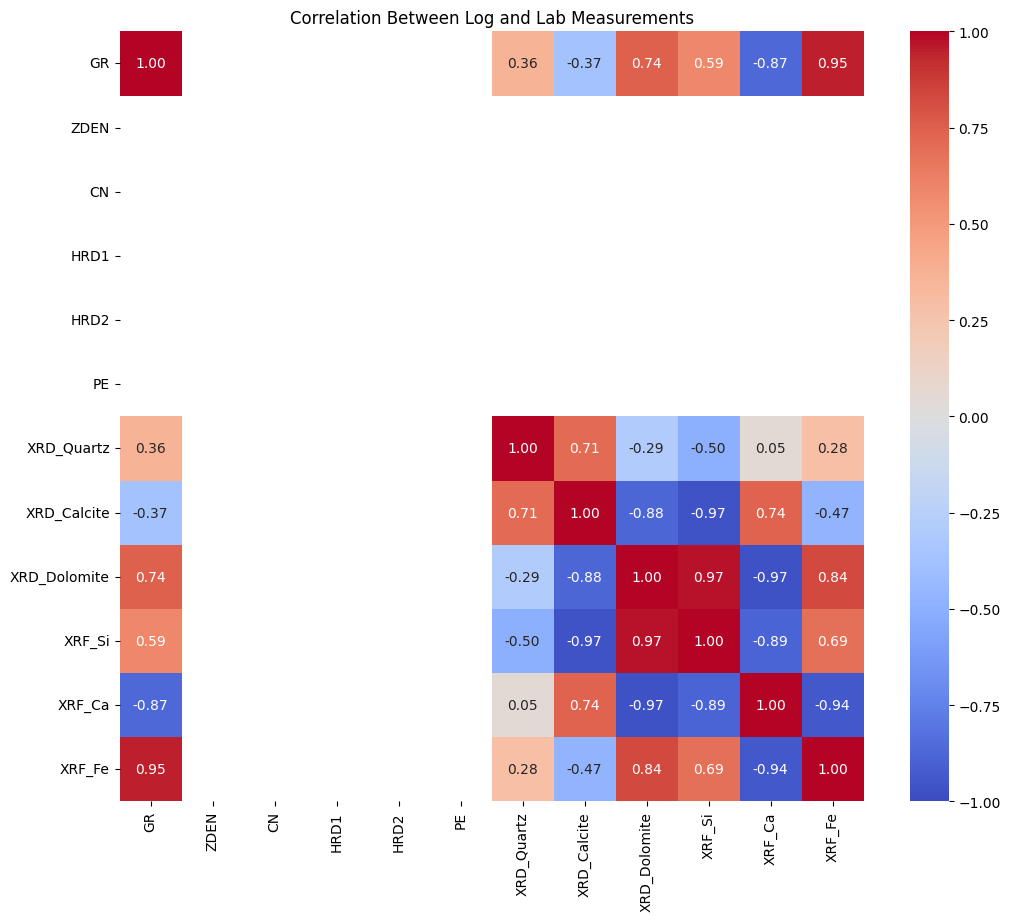

In [ ]:
# 3. Correlation Heatmap
# Select relevant columns from logs and lab data
selected_logs = ['GR', 'ZDEN', 'CN', 'HRD1', 'HRD2', 'PE']
selected_lab = ['XRD_Quartz', 'XRD_Calcite', 'XRD_Dolomite', 'XRF_Si', 'XRF_Ca', 'XRF_Fe']

# Create correlation matrix
correlation_df = joined_df[selected_logs + selected_lab].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Log and Lab Measurements')

Text(0.5, nan, 'Dolomite (%)')

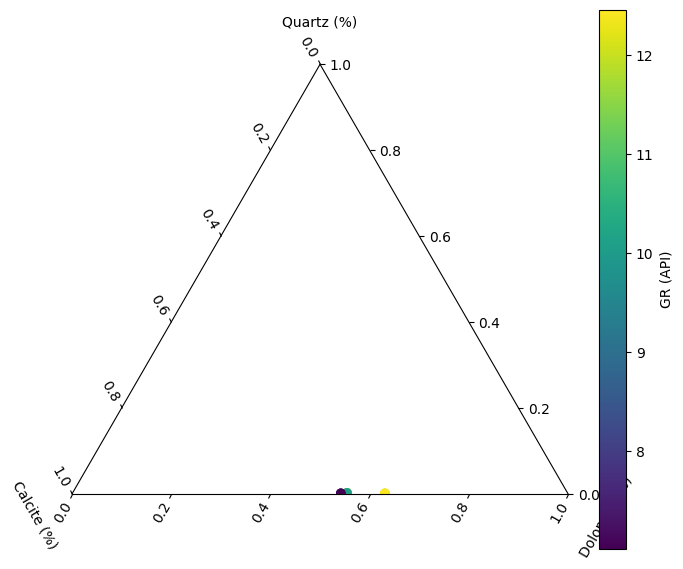

In [ ]:


import mpltern

# Ternary plot for mineralogy
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(projection='ternary')

# Normalize three main minerals to 100%
total = joined_df['XRD_Quartz'] + joined_df['XRD_Calcite'] + joined_df['XRD_Dolomite']
quartz_norm = joined_df['XRD_Quartz'] / total * 100
calcite_norm = joined_df['XRD_Calcite'] / total * 100
dolomite_norm = joined_df['XRD_Dolomite'] / total * 100

# Color by GR
scatter = ax.scatter(quartz_norm, calcite_norm, dolomite_norm, c=joined_df['GR'], cmap='viridis')
plt.colorbar(scatter, label='GR (API)')
ax.set_tlabel('Quartz (%)')
ax.set_llabel('Calcite (%)')
ax.set_rlabel('Dolomite (%)')

Text(0.5, 1.0, 'PCA of Combined Log and Lab Data')

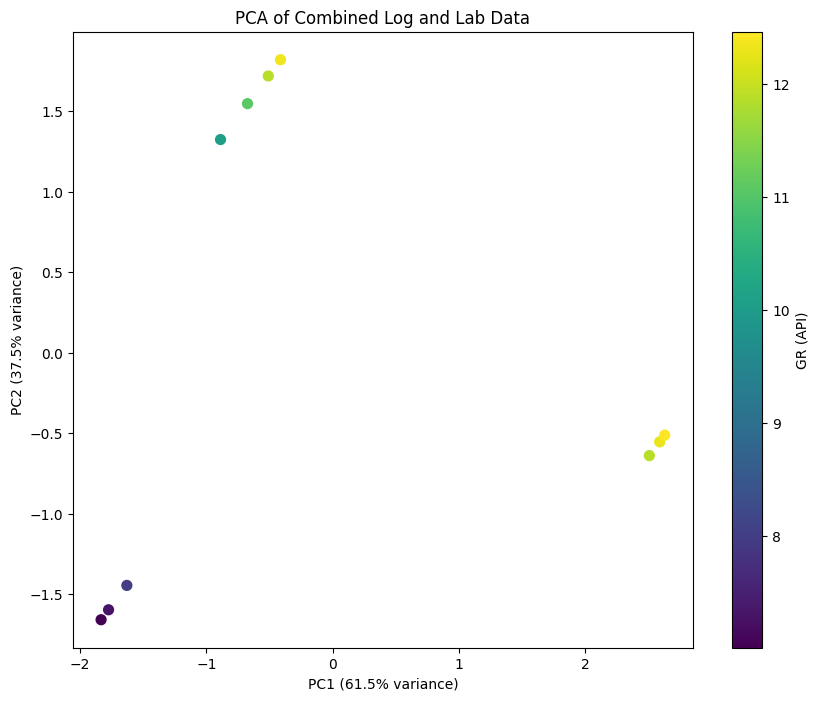

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Combine log and lab data
selected_features = ['GR', 'ZDEN', 'CN', 'XRD_Quartz', 'XRD_Calcite', 'XRF_Si', 'XRF_Fe']
X = joined_df[selected_features].values

# Standardize data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA plot colored by GR
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=joined_df['GR'], cmap='viridis', s=50)
plt.colorbar(label='GR (API)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA of Combined Log and Lab Data')

In [ ]:
%pip install nbformat>=4.2.0

import plotly.express as px

# Create interactive depth plot
fig = px.scatter(joined_df, x='GR', y='Lab_Depth', color='XRD_Quartz',
                hover_data=['XRF_Si', 'XRF_Fe', 'XRF_Ca'])
fig.update_yaxes(autorange="reversed")  # Reverse Y-axis for depth
fig.show()

Note: you may need to restart the kernel to use updated packages.


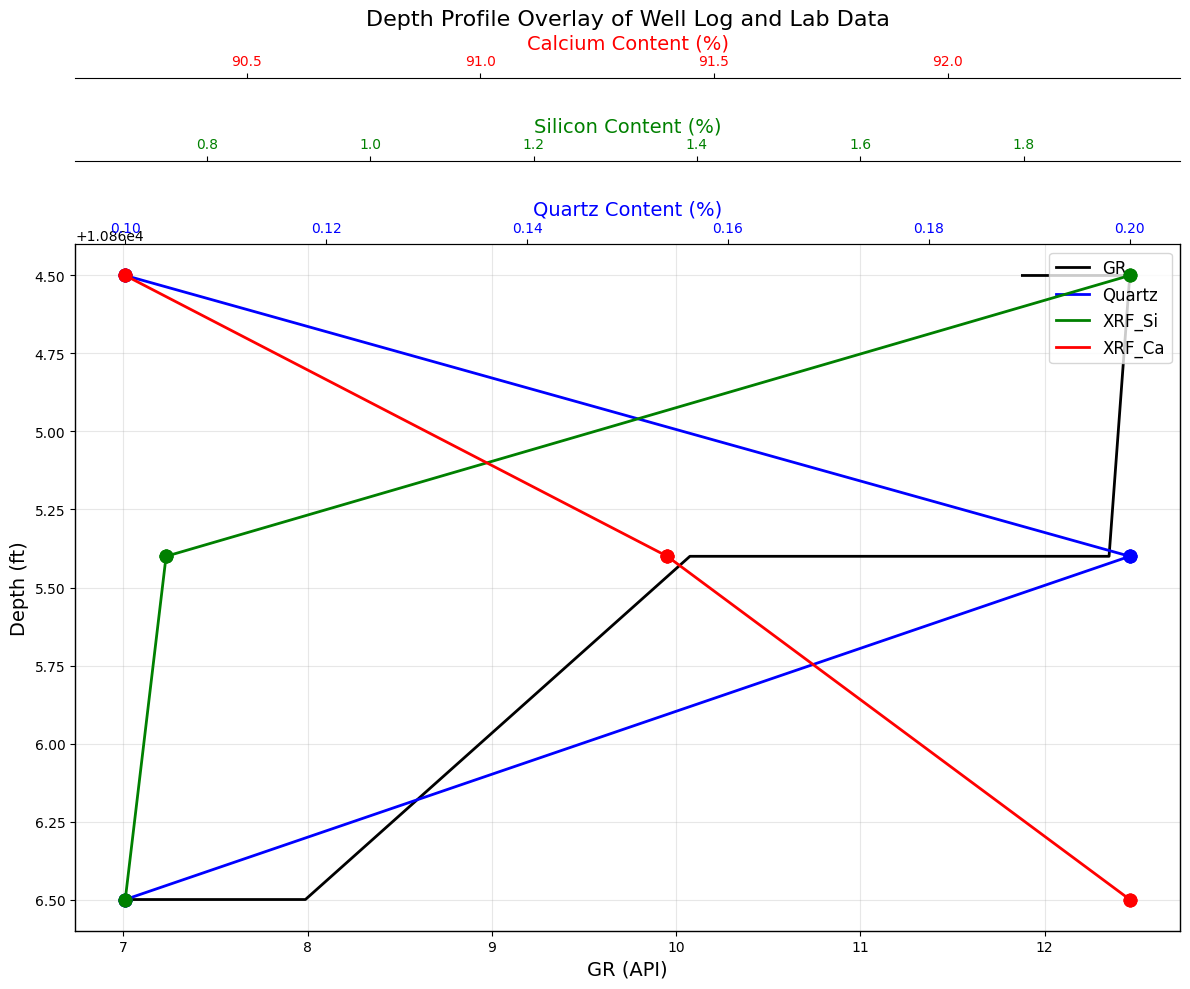

In [ ]:
# Create a depth profile overlay with multiple tracks
fig, ax = plt.subplots(figsize=(12, 10))

# Sort by depth for consistent plotting
joined_df_sorted = joined_df.sort_values('Lab_Depth')

# Primary y-axis for depth
ax.set_ylabel('Depth (ft)', fontsize=14)
ax.invert_yaxis()  # Standard well log convention - depth increases downward

# Plot GR log curve
ax.plot(joined_df_sorted['GR'], joined_df_sorted['Lab_Depth'], 'k-', lw=2, label='GR')
ax.set_xlabel('GR (API)', fontsize=14, color='black')
ax.tick_params(axis='x', labelcolor='black')

# Create secondary axes for other measurements
ax2 = ax.twiny()  # XRD_Quartz
ax2.plot(joined_df_sorted['XRD_Quartz'], joined_df_sorted['Lab_Depth'], 'b-', lw=2, label='Quartz')
ax2.scatter(joined_df_sorted['XRD_Quartz'], joined_df_sorted['Lab_Depth'], c='blue', s=80)
ax2.set_xlabel('Quartz Content (%)', fontsize=14, color='blue')
ax2.tick_params(axis='x', labelcolor='blue')

ax3 = ax.twiny()  # XRF_Si
ax3.plot(joined_df_sorted['XRF_Si'], joined_df_sorted['Lab_Depth'], 'g-', lw=2, label='XRF_Si')
ax3.scatter(joined_df_sorted['XRF_Si'], joined_df_sorted['Lab_Depth'], c='green', s=80)
ax3.spines['top'].set_position(('outward', 60))
ax3.set_xlabel('Silicon Content (%)', fontsize=14, color='green')
ax3.tick_params(axis='x', labelcolor='green')

ax4 = ax.twiny()  # XRF_Ca
ax4.plot(joined_df_sorted['XRF_Ca'], joined_df_sorted['Lab_Depth'], 'r-', lw=2, label='XRF_Ca')
ax4.scatter(joined_df_sorted['XRF_Ca'], joined_df_sorted['Lab_Depth'], c='red', s=80)
ax4.spines['top'].set_position(('outward', 120))
ax4.set_xlabel('Calcium Content (%)', fontsize=14, color='red')
ax4.tick_params(axis='x', labelcolor='red')

# Add a title and grid
plt.title('Depth Profile Overlay of Well Log and Lab Data', fontsize=16)
ax.grid(True, alpha=0.3)

# Create a custom legend
lines_labels = [ax.get_legend_handles_labels(), 
                ax2.get_legend_handles_labels(),
                ax3.get_legend_handles_labels(),
                ax4.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax.legend(lines, labels, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:

# Then in a new cell:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sort by depth
joined_df_sorted = joined_df.sort_values('Lab_Depth')

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=joined_df_sorted['GR'], y=joined_df_sorted['Lab_Depth'], mode='lines+markers',
               name='GR', line=dict(color='black', width=3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=joined_df_sorted['XRD_Quartz'], y=joined_df_sorted['Lab_Depth'], 
               mode='markers', name='Quartz', marker=dict(color='blue', size=10)),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=joined_df_sorted['XRF_Si'], y=joined_df_sorted['Lab_Depth'], 
               mode='markers', name='XRF Si', marker=dict(color='green', size=10)),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=joined_df_sorted['XRF_Ca'], y=joined_df_sorted['Lab_Depth'], 
               mode='markers', name='XRF Ca', marker=dict(color='red', size=10)),
    secondary_y=True,
)

# Set axes properties
fig.update_layout(
    title='Interactive Depth Profile Overlay',
    xaxis=dict(title='GR (API)'),
    yaxis=dict(title='Depth (ft)', autorange="reversed"),
    yaxis2=dict(title='Depth (ft)', autorange="reversed", overlaying='y', side='right'),
    legend=dict(x=1.1, y=0.5),
    hovermode='closest'
)

fig.show()